In [1]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
from datetime import date

from Functions import date_years_ago
from Stock import Stock

from sklearn.model_selection import train_test_split
import statsmodels.tsa.api as tsa
from statsmodels.graphics import tsaplots
import torch
import torch.nn as nn


In [2]:
ticker = yf.Ticker("AAPL")
data = yf.download("AAPL")

if ticker.info['regularMarketPrice']:
    print(ticker.info['regularMarketPrice'])
else:
    print("Error")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


273.47


In [67]:
dividends = ticker.dividends
info = ticker.info

print(dividends)
print(info.get("dividendRate"), info.get("dividendYield"))

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2024-11-08 00:00:00-05:00    0.250000
2025-02-10 00:00:00-05:00    0.250000
2025-05-12 00:00:00-04:00    0.260000
2025-08-11 00:00:00-04:00    0.260000
2025-11-10 00:00:00-05:00    0.260000
Name: Dividends, Length: 89, dtype: float64
1.04 0.38


In [85]:
stock = Stock('GOOG')

dividends_df = stock.get_dividends()
dividends_df

Date
2024-06-10 00:00:00-04:00    0.20
2024-09-09 00:00:00-04:00    0.20
2024-12-09 00:00:00-05:00    0.20
2025-03-10 00:00:00-04:00    0.20
2025-06-09 00:00:00-04:00    0.21
2025-09-08 00:00:00-04:00    0.21
Name: Dividends, dtype: float64

In [164]:
# test function
def plot_dividends(div_df: pd.DataFrame):
    """ forecast future dividends (and maybe when dividends will increase based on revenue/income/stock price) """
    fig = px.line(data_frame=div_df, x='Date', y='Dividends', color='Company', markers=True)
    fig.show()

# div_df = stock.get_dividends().reset_index()
# plot_dividends(div_df)

In [159]:
# test function

from Database.database import engine
from Database.models import Holding
from sqlalchemy import select

with engine.connect() as conn:
    holdings_df = pd.read_sql(select(Holding), conn)

dividends_df = pd.DataFrame(columns=['Date','Dividends', 'Company'])

for ticker in holdings_df['ticker']:
    stock = Stock(ticker)

    divs_df = stock.get_dividends().reset_index()
    divs_df['Company'] = ticker

    dividends_df = pd.concat([dividends_df, divs_df])

# dividends_df

2025-11-12 19:43:28,089 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-11-12 19:43:28,091 INFO sqlalchemy.engine.Engine SELECT holdings.id, holdings.ticker, holdings."holdingType", holdings."holdingSize", holdings."dateAdded", holdings."dateEdited" 
FROM holdings
2025-11-12 19:43:28,093 INFO sqlalchemy.engine.Engine [cached since 1.178e+05s ago] ()
2025-11-12 19:43:28,097 INFO sqlalchemy.engine.Engine ROLLBACK


C:\Users\Anay-\AppData\Local\Temp\ipykernel_32128\3464183309.py:18: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,Date,Dividends,Company
0,1987-05-11 00:00:00-04:00,0.000536,AAPL
1,1987-08-10 00:00:00-04:00,0.000536,AAPL
2,1987-11-17 00:00:00-05:00,0.000714,AAPL
3,1988-02-12 00:00:00-05:00,0.000714,AAPL
4,1988-05-16 00:00:00-04:00,0.000714,AAPL
...,...,...,...
84,2024-11-08 00:00:00-05:00,0.250000,AAPL
85,2025-02-10 00:00:00-05:00,0.250000,AAPL
86,2025-05-12 00:00:00-04:00,0.260000,AAPL
87,2025-08-11 00:00:00-04:00,0.260000,AAPL


In [165]:
plot_dividends(dividends_df)

In [12]:
def message_handler(message):
    print("Received message: ", message)


In [13]:
def market_info(market_name):
    market = yf.Market(market_name)
    status = market.status
    summary = market.summary

    print(status)
    print(summary)

In [14]:
def options(ticker_name):
    ticker = yf.Ticker(ticker_name)

    return ticker.option_chain(ticker.options[0]).calls


In [ ]:
ticker = yf.Ticker("AAPL")
tickers = yf.Tickers(' aapl msft goog')

In [ ]:
analyst_price_targets = ticker.analyst_price_targets
calendar = ticker.calendar


In [166]:
appl_df = yf.download("AAPL", period="10y", interval="1d")
appl_df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-11-13,25.329185,26.057451,25.313403,25.974027,183249600
2015-11-16,25.744047,25.757575,25.027056,25.112733,152426800
2015-11-17,25.633564,25.940202,25.550140,25.910890,110467600
2015-11-18,26.445248,26.490341,26.041658,26.100281,186698800
2015-11-19,26.781197,26.999902,26.325750,26.524162,173183200
...,...,...,...,...,...
2025-11-06,269.508728,273.135217,267.630574,267.630574,51204000
2025-11-07,268.209991,272.026299,266.511626,269.538690,48227400


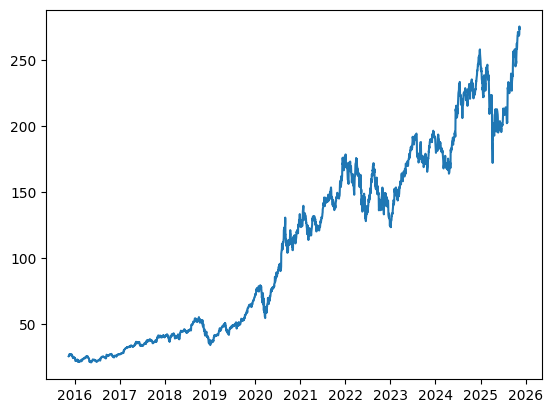

In [168]:
plt.plot(appl_df['Close'])
plt.show()

In [175]:
tsaplots.acf(appl_df['Close'])

array([1.        , 0.99816074, 0.99628284, 0.99445501, 0.99269447,
       0.99094397, 0.98920526, 0.98748236, 0.98578518, 0.98410914,
       0.98238194, 0.98072642, 0.97905625, 0.97738774, 0.9757618 ,
       0.9741954 , 0.97264513, 0.97105987, 0.96950175, 0.96800663,
       0.96655781, 0.96504934, 0.96355839, 0.96208351, 0.96062328,
       0.95907921, 0.95749252, 0.95591827, 0.95430325, 0.95265595,
       0.95104606, 0.94949811, 0.94798051, 0.94642631, 0.94485358])

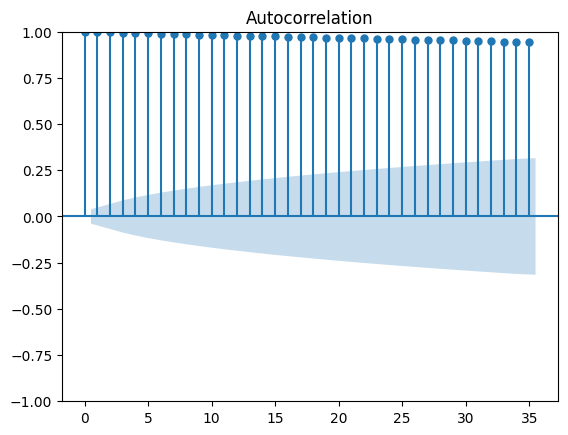

In [192]:
tsaplots.plot_acf(appl_df['Close'])
plt.show()